###Project Developer:
####Ishtiaque Ahmed(212-15-4217)


#All nessacery Library for our code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from scipy.stats import zscore
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action = "ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data read from our drive

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Research/sample dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape


(768, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#EDA
##analysis of data


In [ ]:
lst=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
def plot_dis(data, variable, ax):
    sns.distplot(data[variable], bins=20, ax=ax)
    ax.set_title(variable)

####Distribution plot

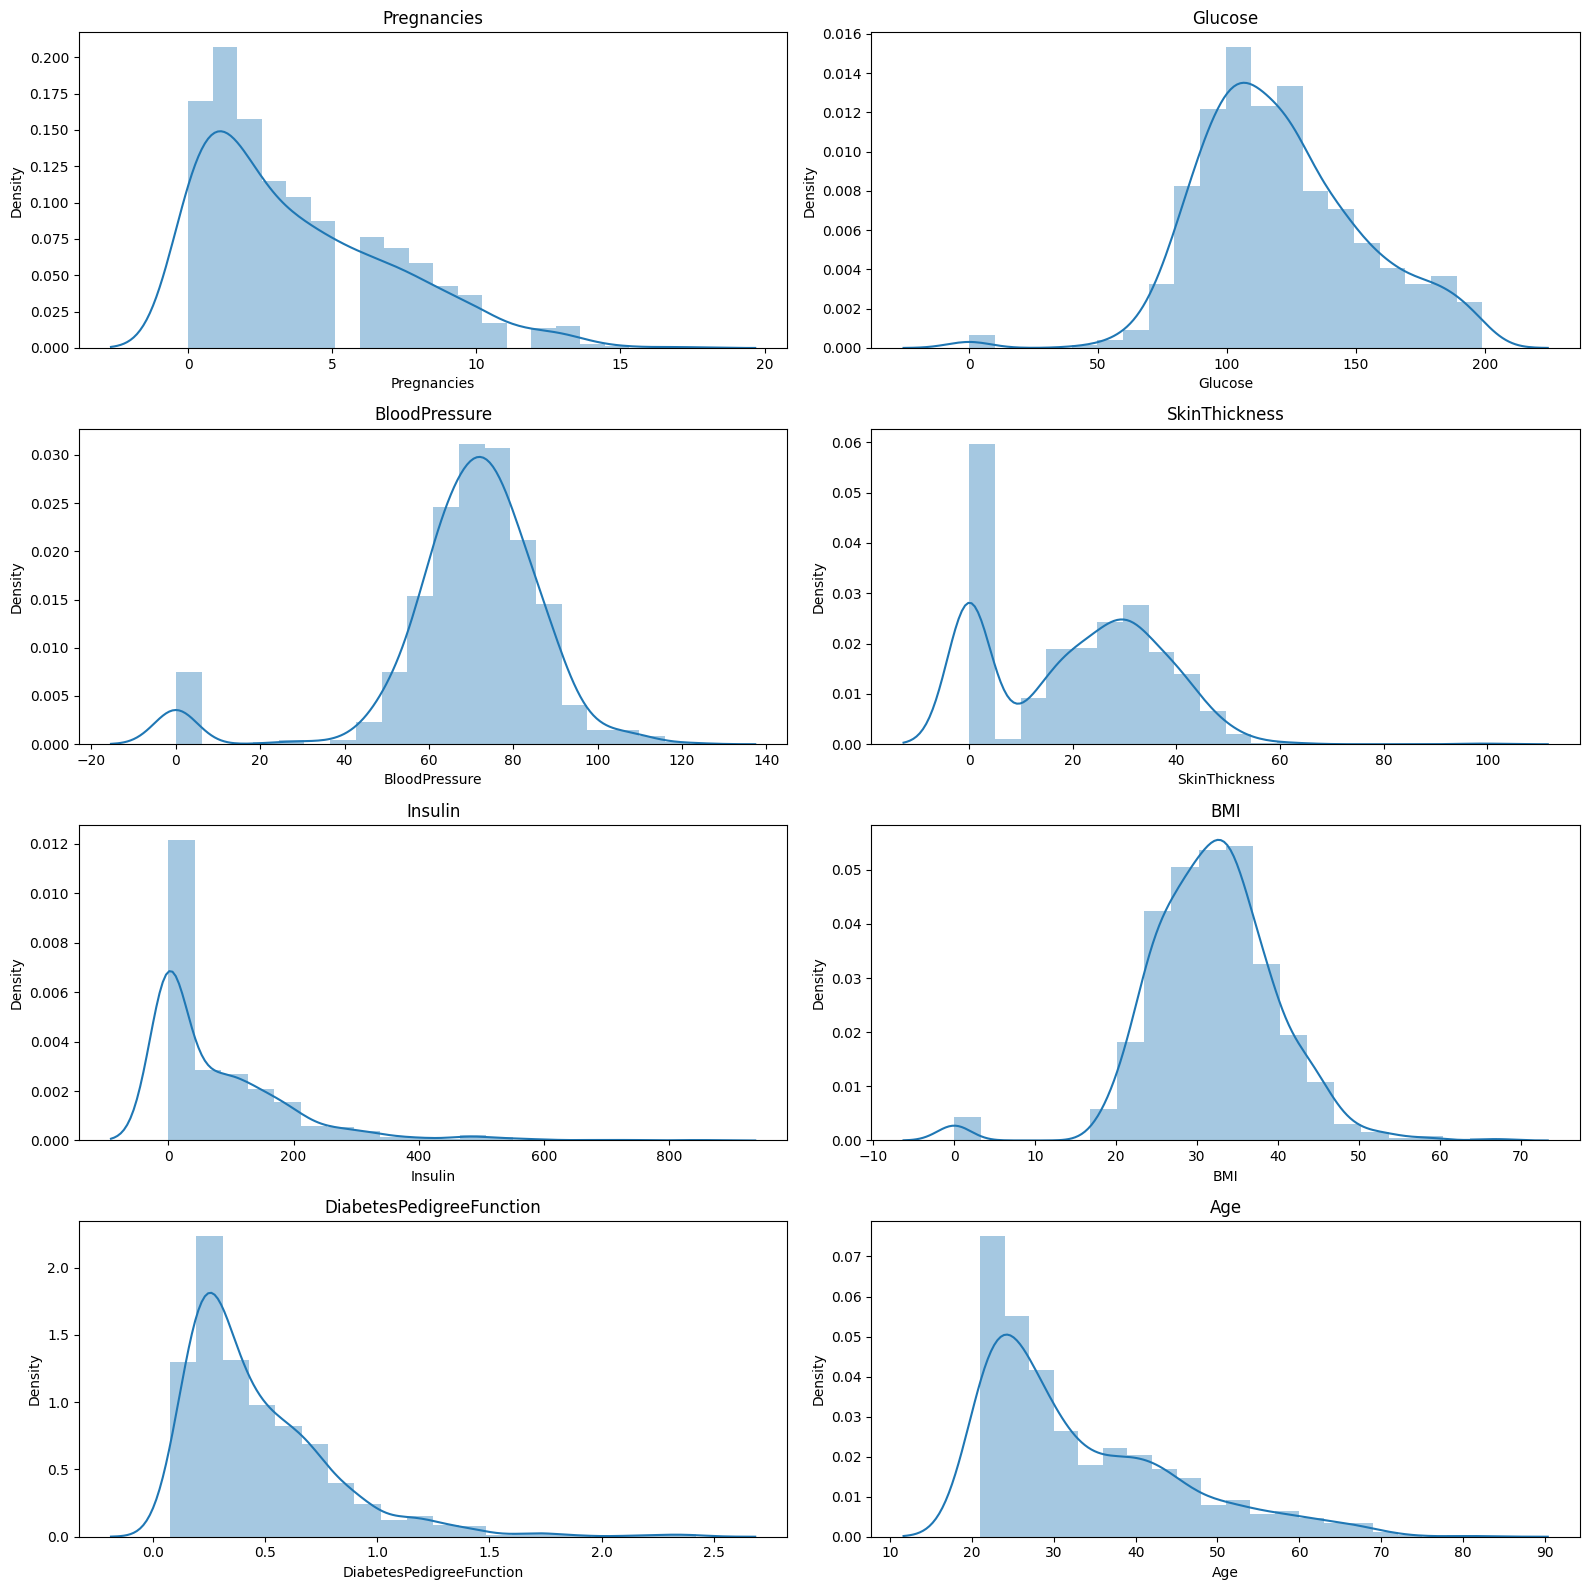

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(16, 16))
for i, variable in enumerate(lst):
    plot_dis(df, variable, ax[i // 2, i % 2])

plt.tight_layout()
plt.show()

###Box plots

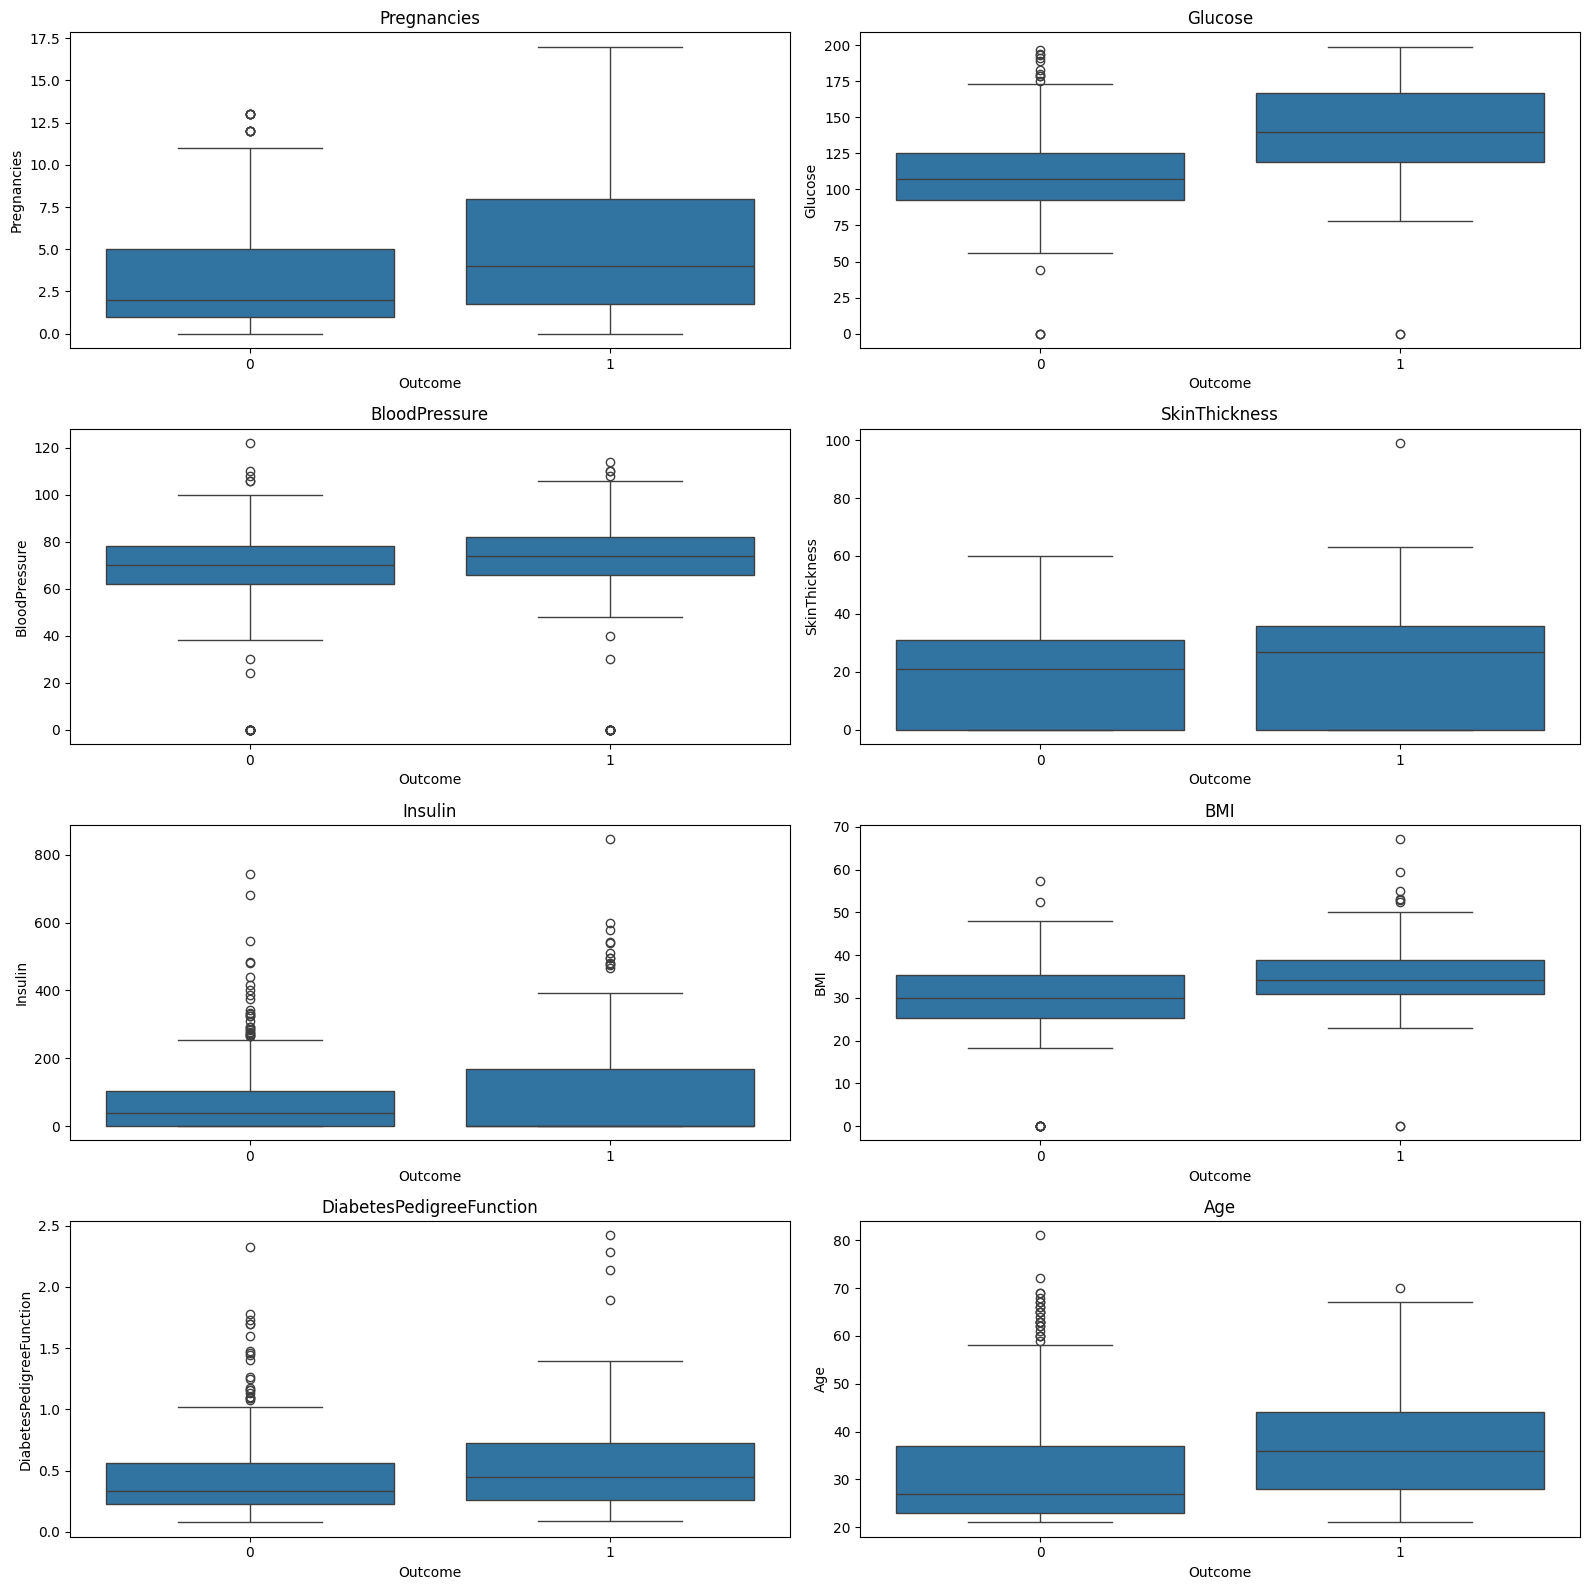

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, variable in enumerate(lst):
    sns.boxplot(x='Outcome', y=variable, data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(variable)

plt.tight_layout()
plt.show()


###Pair Plot

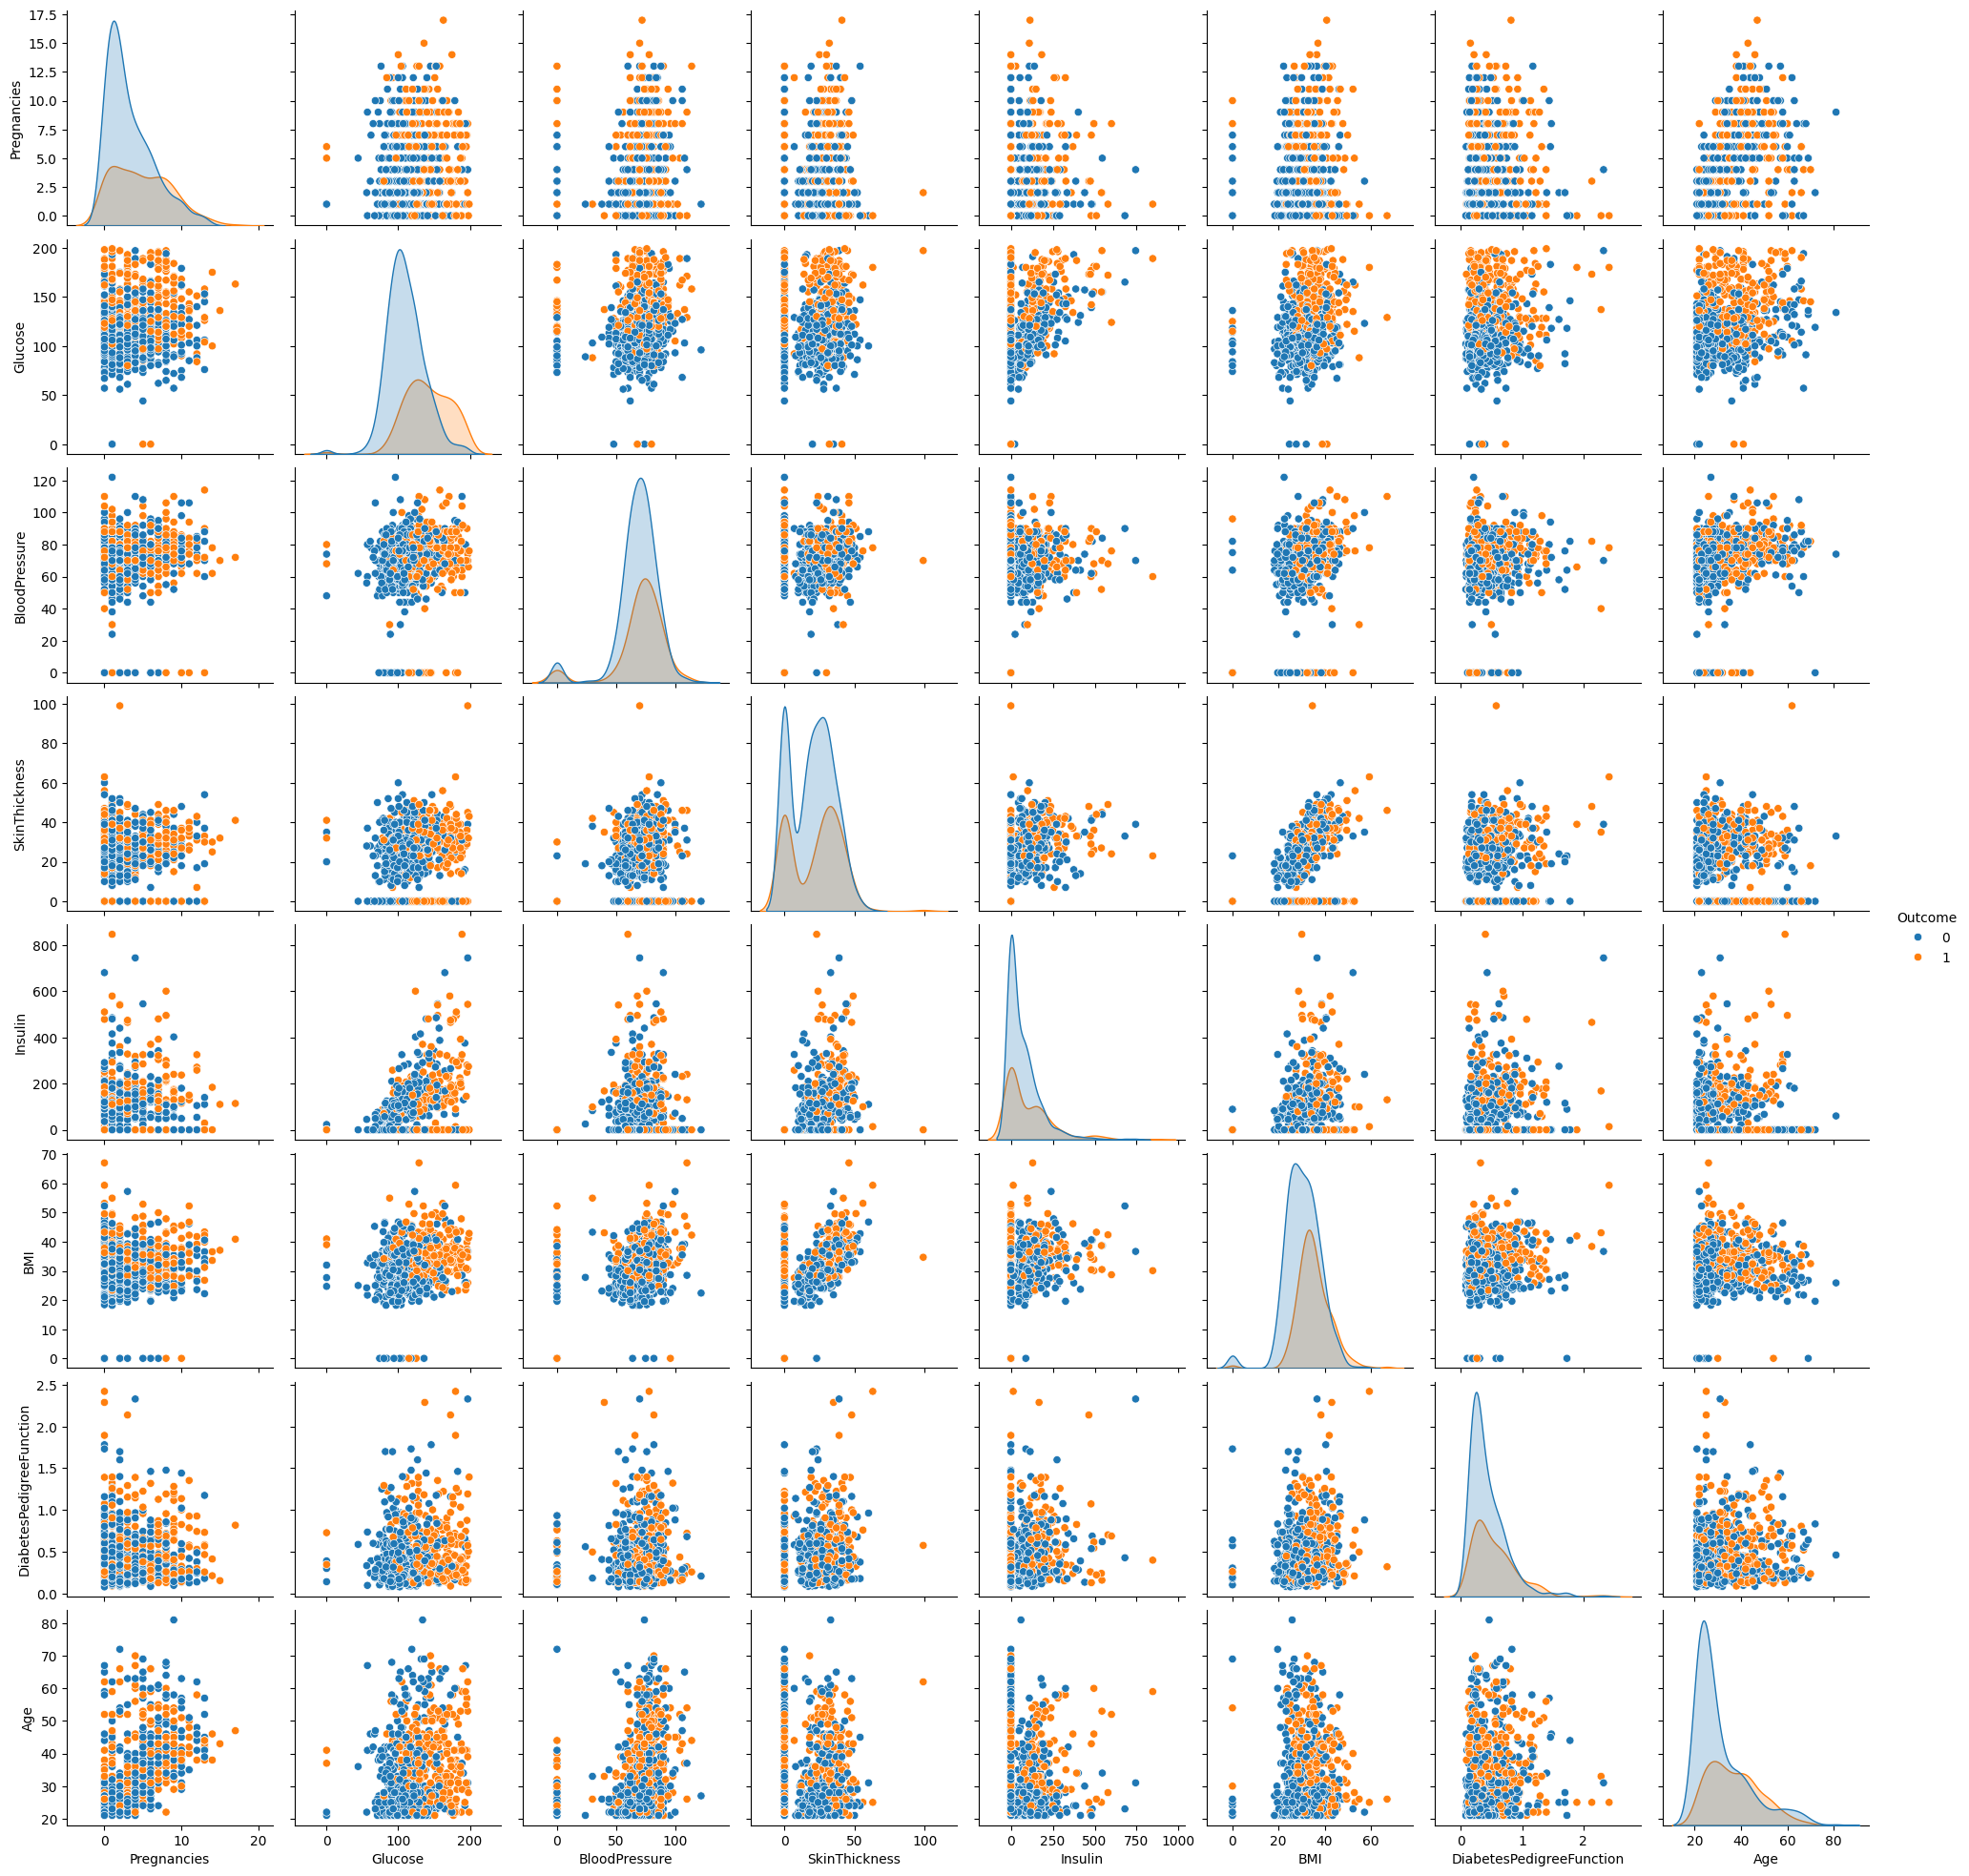

In [ ]:
sns.pairplot(df,hue='Outcome')

<Axes: xlabel='BMI', ylabel='Density'>

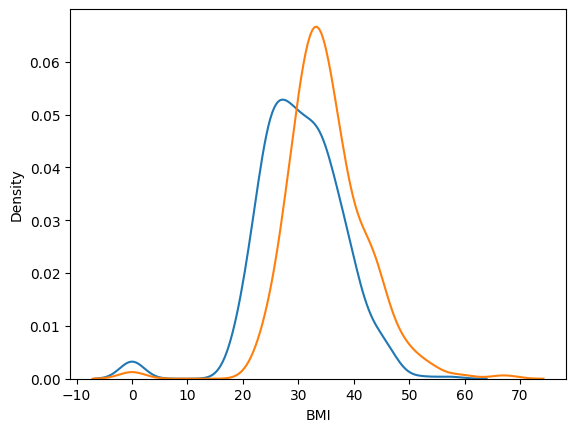

In [ ]:
sns.distplot(df[df['Outcome']==0]['BMI'],hist=False)
sns.distplot(df[df['Outcome']==1]['BMI'],hist=False)

###Lineplot

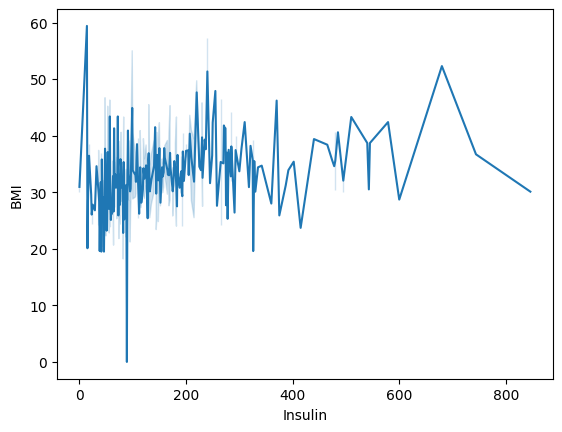

In [ ]:
sns.lineplot(x='Insulin', y='BMI', data=df)

# Show the plot
plt.show()

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


###Check is there is any outlier

In [ ]:
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    if not outliers.empty:
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose yes
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


## Use caping method to handle outlier
### The dataset doesn't have much data so we use the caping method to handle the outlier

In [ ]:
def out_df(df,lst):
  for i in lst:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    df[i] = np.where(
       df[i] > upper_limit,
       upper_limit,
       np.where(
          df[i] < lower_limit,
          lower_limit,
          df[i]
       )
    )
  return df

In [ ]:
df = out_df(df,lst)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


###Agin check for the outlier

In [ ]:
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    if not outliers.empty:
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


###See the box plot to check wheather it's correct or not

In [ ]:
def df_box(df,cl_lst):
  for i in cl_lst:
    sns.boxplot(x = df[i])
    plt.show()

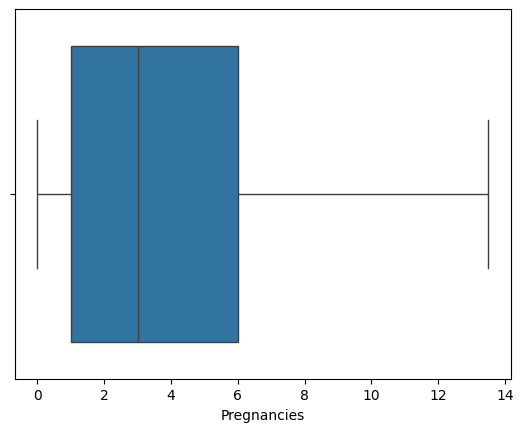

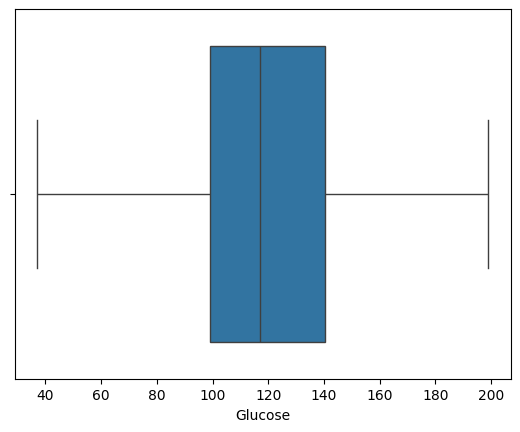

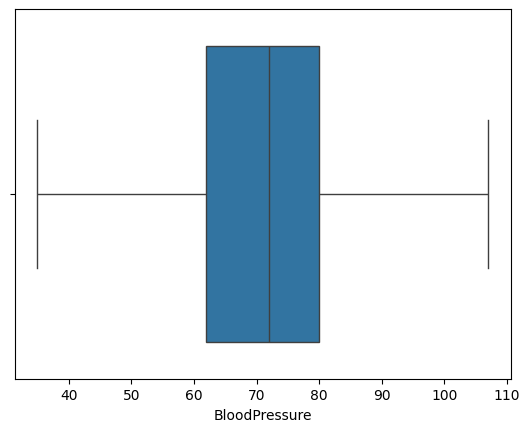

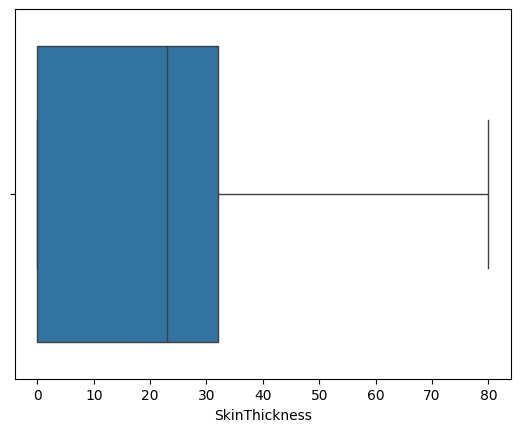

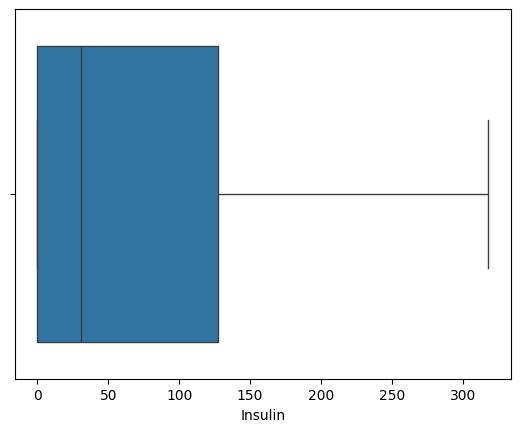

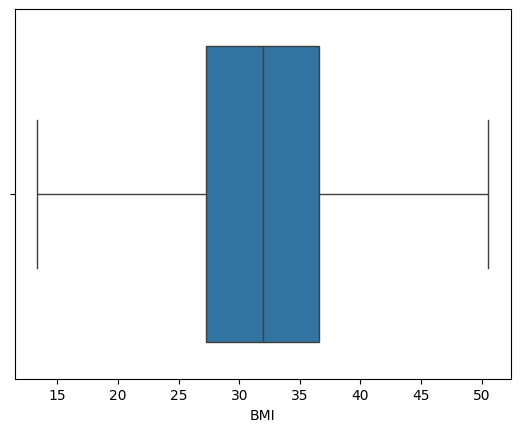

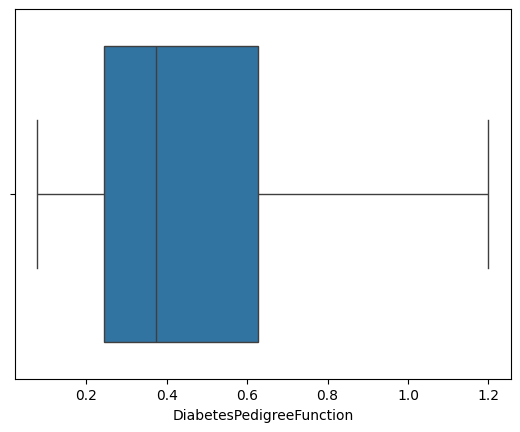

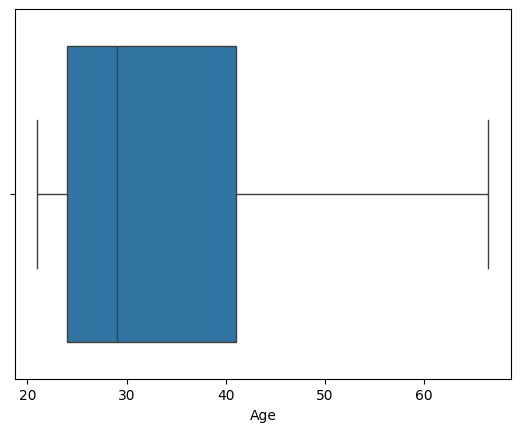

In [ ]:
df_box(df,lst)

In [ ]:
#df_box(df_new,lst)

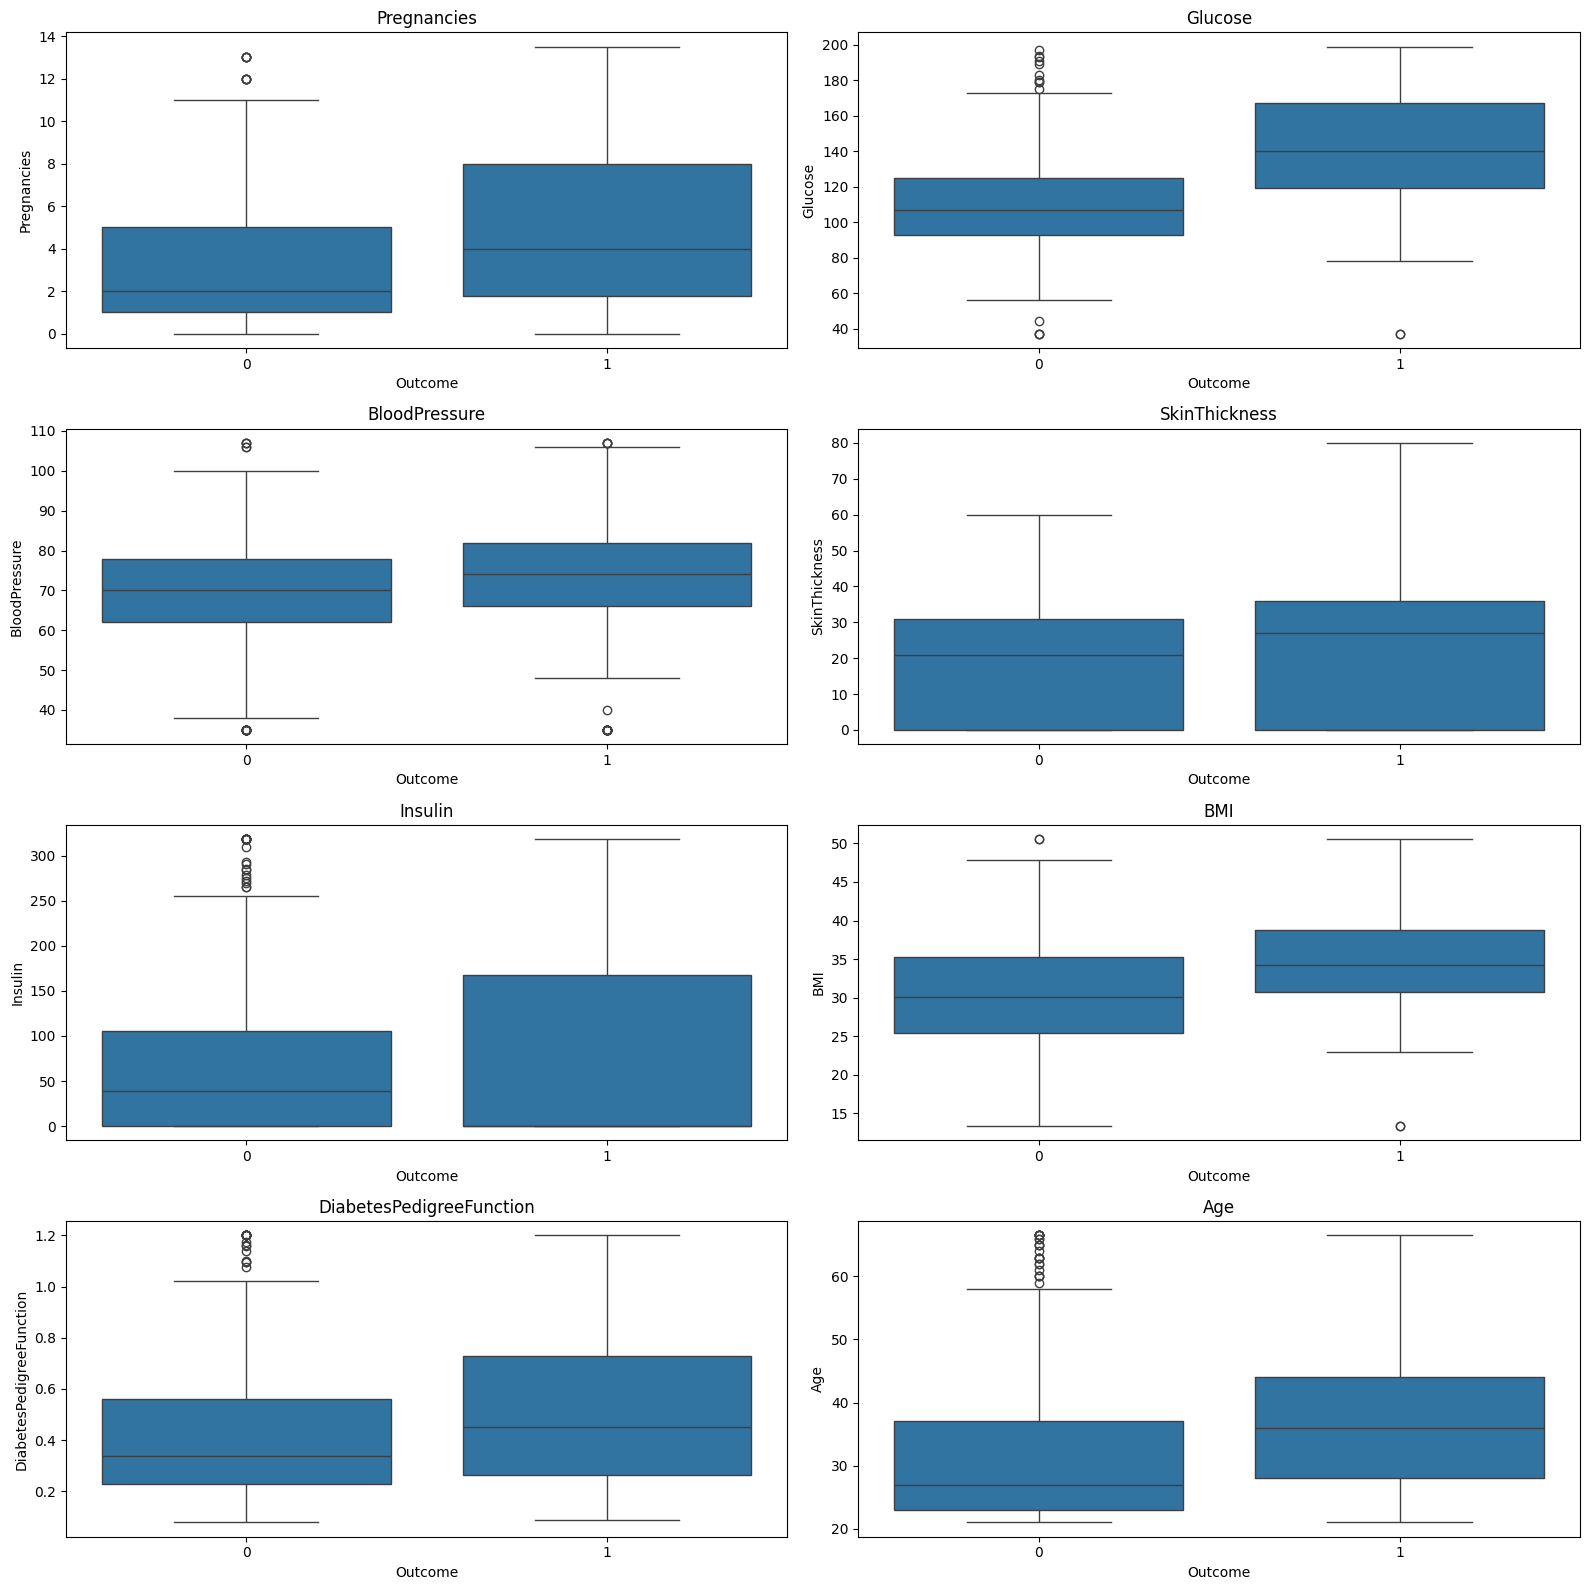

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

for i, variable in enumerate(lst):
    sns.boxplot(x='Outcome', y=variable, data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(variable)

plt.tight_layout()
plt.show()

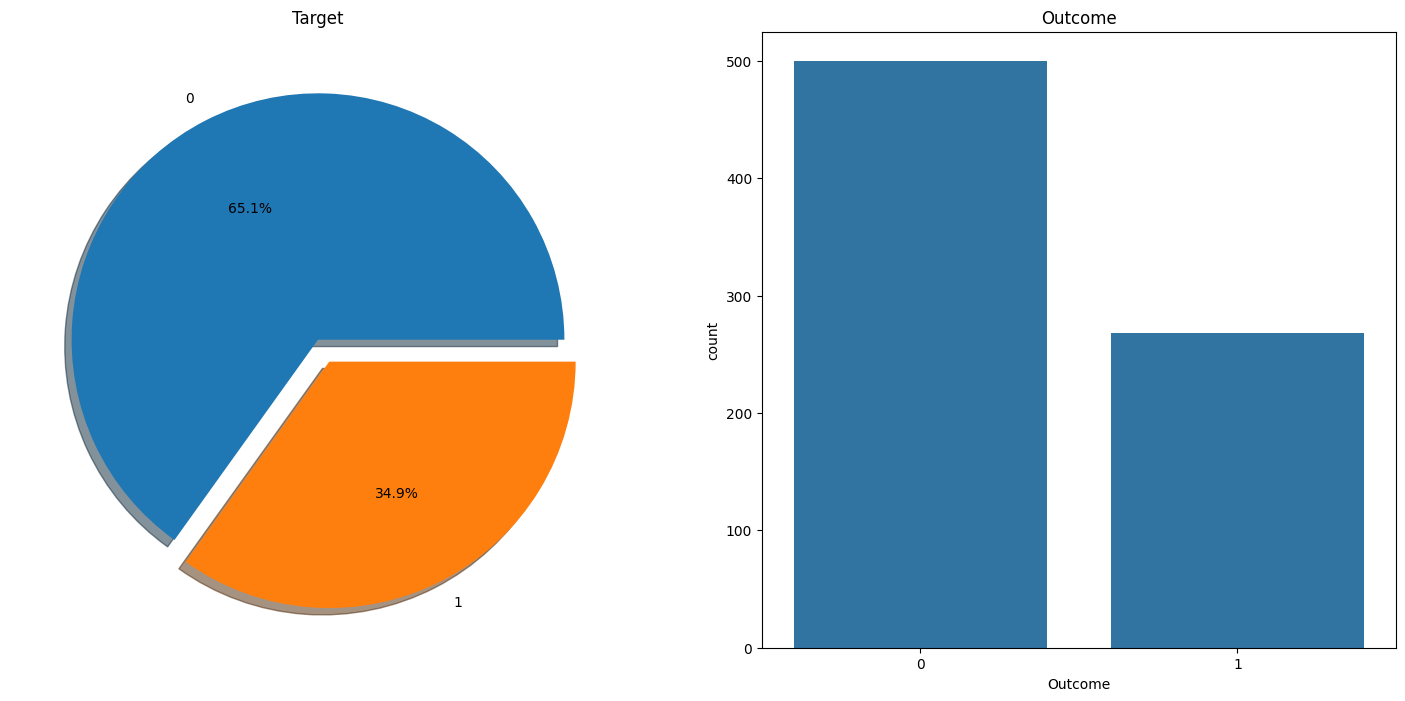

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Plotting count plot
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Specify x parameter for countplot
ax[1].set_title('Outcome')

plt.show()


##Check the correlation for each columns

<Axes: >

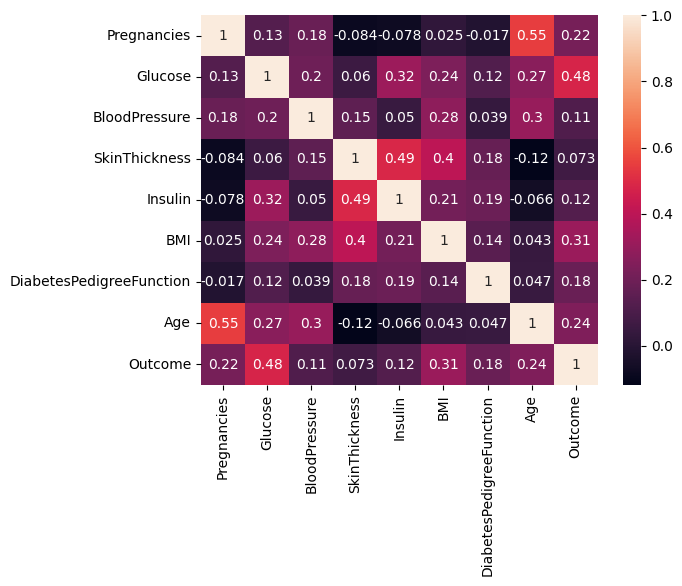

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

BMI columns

the glucose column trainsform

#Pre-process all the data

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


##Splitting

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

test = SelectKBest(score_func= f_classif,k='all')
test.fit(X,y)
scores= pd.DataFrame(test.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Pregnancies,39.106100
1,Glucose,228.278996
2,BloodPressure,9.961146
3,SkinThickness,4.118049
4,Insulin,12.103615
5,BMI,81.287147
6,DiabetesPedigreeFunction,27.135876
7,Age,47.944757


In [ ]:
X = X.drop('SkinThickness',1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

#This class is for pipeline data pre-processing

###Developed By Ishtiaque Ahmed

In [ ]:
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.df_original = None  # Will store the original DataFrame
        self.df = None  # Will store the processed DataFrame

    def fit(self, X, y=None):
        # mainly call the fit to set the data
        # Store the original DataFrame during fit
        self.df_original = X.copy()
        return self

    def set_glucose(self, row):
        NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
        if row["Glucose"] <= 70:
            return NewGlucose[0]
        elif (row["Glucose"] > 70) and (row["Glucose"] <= 99):
            return NewGlucose[1]
        elif (row["Glucose"] > 99) and (row["Glucose"] <= 126):
            return NewGlucose[2]
        elif row["Glucose"] > 126:
            return NewGlucose[3]

    def categorize_glucose(self):

        NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
        self.df["NewGlucose"] = self.df.apply(self.set_glucose, axis=1)
        self.df["NewGlucose"] = pd.Categorical(self.df["NewGlucose"], categories=NewGlucose, ordered=True)
        self.df = self.df.drop("Glucose", axis=1)  # Drop only the 'Glucose' column
        return self.df

    def set_bmi(self, row):
        new_bmi_categories = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"],
                                       dtype="category")

        if row["BMI"] < 18.5:
            return new_bmi_categories[0]
        elif (row["BMI"] > 18.5) and (row["BMI"] <= 24.9):
            return new_bmi_categories[1]
        elif (row["BMI"] > 24.9) and (row["BMI"] <= 29.9):
            return new_bmi_categories[2]
        elif (row["BMI"] > 29.9) and (row["BMI"] <= 34.9):
            return new_bmi_categories[3]
        elif (row["BMI"] > 34.9) and (row["BMI"] <= 39.9):
            return new_bmi_categories[4]
        elif row["BMI"] > 39.9:
            return new_bmi_categories[5]

    def categorize_bmi(self):
        new_bmi_categories = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"],
                                       dtype="category")
        self.df["NewBMI"] = self.df.apply(self.set_bmi, axis=1)
        self.df["NewBMI"] = pd.Categorical(self.df["NewBMI"], categories=new_bmi_categories, ordered=True)
        # Drop only the 'BMI' column
        self.df = self.df.drop("BMI", axis=1)
        return self.df

    def set_insulin(self, row):
        if row["Insulin"] >= 16 and row["Insulin"] <= 166:
            return "Normal"
        else:
            return "Abnormal"

    def categorize_insulin(self):
        self.df["NewInsulinScore"] = self.df.apply(self.set_insulin, axis=1)

        self.df = self.df.drop("Insulin", axis=1)

        return self.df

    def encode_insulin(self):
        L_encoder = LabelEncoder()

        # Encode labels in column 'species'.
        self.df['NewInsulinScore'] = L_encoder.fit_transform(self.df['NewInsulinScore'])

    def encode_glucose(self):
        category_order = ["Low", "Normal", "Overweight", "Secret", "High"]

        # Apply ordinal encoding to "NewGlucose"
        ordinal_encoder = OrdinalEncoder(categories=[category_order])
        self.df["NewGlucose"] = ordinal_encoder.fit_transform(self.df[["NewGlucose"]])

    def one_hot_encode_bmi(self):
        # Apply one hot encoding for the NewBMI
        self.df = pd.get_dummies(self.df, columns=["NewBMI"], dtype=float)
    def stan_scl(self):
        numeric_features = ['Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']
        scaler = StandardScaler()
        self.df[numeric_features] = scaler.fit_transform(self.df[numeric_features])

    def transform(self, X,y=None):
        self.df = X.copy()
        self.categorize_glucose()
        self.categorize_bmi()
        self.categorize_insulin()
        self.encode_insulin()
        self.encode_glucose()
        self.one_hot_encode_bmi()
        self.stan_scl()

        return self.df


After the data is preprocessed the object of that class is called to see if the data is processed

In [ ]:
data_preprocessor = DataPreprocessor()
preprocessed_df = data_preprocessor.fit_transform(df)

In [ ]:
preprocessed_df

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Outcome,NewGlucose,NewInsulinScore,NewBMI_Normal,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight
0,0.647150,0.092691,35.0,0.588927,1.445691,1,3.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.848970,-0.330201,29.0,-0.378101,-0.189304,0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.245598,-0.471166,0.0,0.746595,-0.103252,1,3.0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.848970,-0.330201,23.0,-1.022787,-1.049828,0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.148194,-2.162737,35.0,2.596563,-0.017199,1,3.0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.844045,0.374620,48.0,-1.008772,2.564372,0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0
764,-0.549746,-0.048273,27.0,-0.416642,-0.533513,0,2.0,0,0.0,0.0,1.0,0.0,0.0,0.0
765,0.347926,0.092691,23.0,-0.749497,-0.275356,0,2.0,1,0.0,0.0,0.0,0.0,1.0,0.0
766,-0.848970,-0.753094,0.0,-0.385109,1.187534,1,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


This segemnt is for manual chacking

In [ ]:
y_prm = preprocessed_df["Outcome"]
X_prm = preprocessed_df.drop(["Outcome"], axis = 1)

In [ ]:
Xprm_train, Xprm_test, yprm_train, yprm_test = train_test_split(X_prm, y_prm, test_size=0.2, random_state=46)


###For all the classification check Deleloped by both


In [ ]:
random_seed = 46
classifiers = [
      ('LR', LogisticRegression(random_state=random_seed)),
      ('KNN', KNeighborsClassifier()),
      ('DT', DecisionTreeClassifier(random_state=random_seed)),
      ('RF', RandomForestClassifier(random_state=random_seed)),
      ('SVM', SVC(gamma='auto', random_state=random_seed)),
      ('XGB', GradientBoostingClassifier(random_state=random_seed)),
      ('NB', GaussianNB()),
      ('AdaBoost', AdaBoostClassifier(random_state=random_seed)),
      ('ExtraTrees', ExtraTreesClassifier(random_state=random_seed)),
      ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=random_seed), random_state=random_seed)),
      ('NuSVC', NuSVC(random_state=random_seed))
  ]

LR Accuracy: 0.7143
LR Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       101
           1       0.58      0.58      0.58        53

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



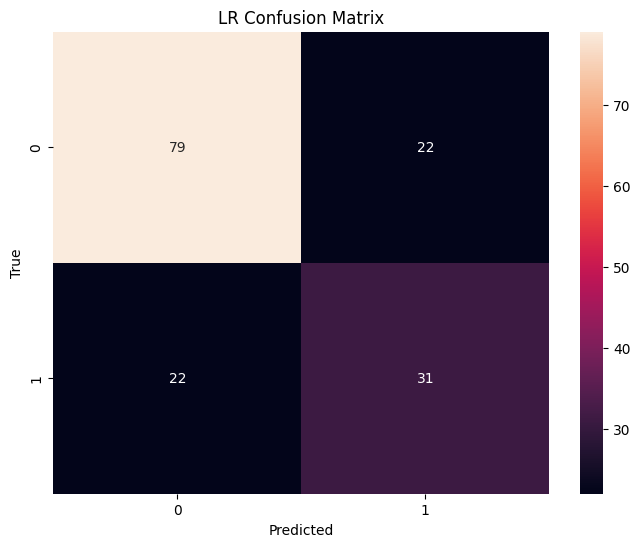

KNN Accuracy: 0.6688
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       101
           1       0.52      0.53      0.52        53

    accuracy                           0.67       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.67      0.67       154



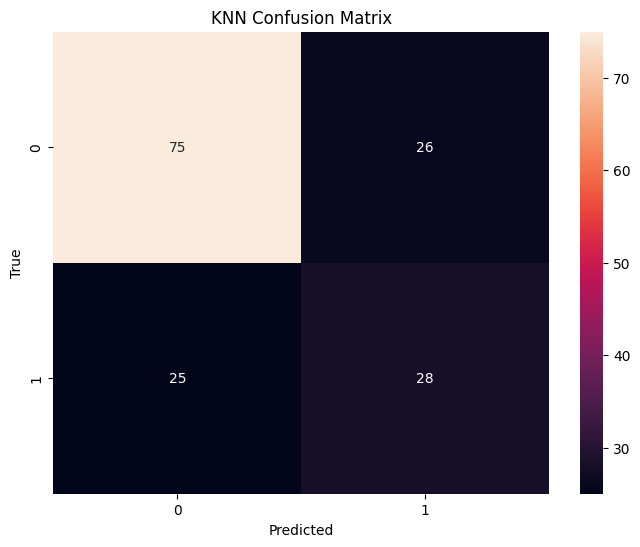

DT Accuracy: 0.5974
DT Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.68       101
           1       0.43      0.51      0.47        53

    accuracy                           0.60       154
   macro avg       0.57      0.58      0.57       154
weighted avg       0.62      0.60      0.60       154



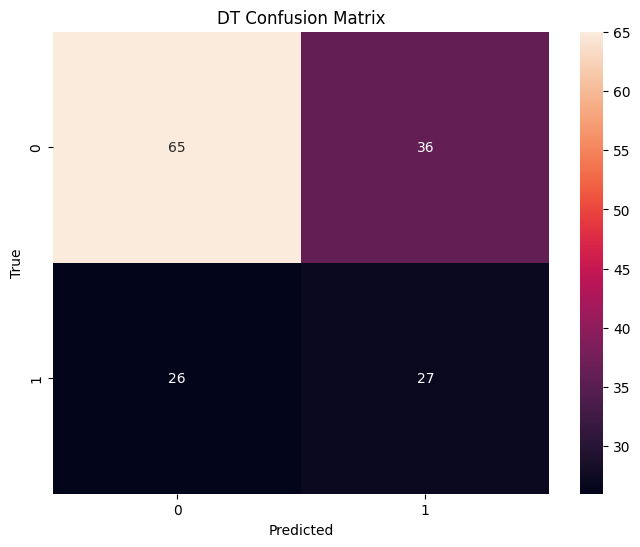

RF Accuracy: 0.7013
RF Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       101
           1       0.57      0.55      0.56        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



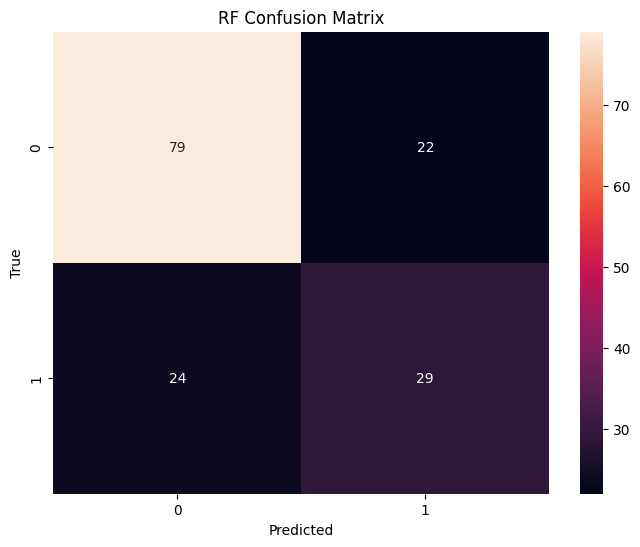

SVM Accuracy: 0.6883
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       101
           1       0.56      0.45      0.50        53

    accuracy                           0.69       154
   macro avg       0.65      0.63      0.64       154
weighted avg       0.68      0.69      0.68       154



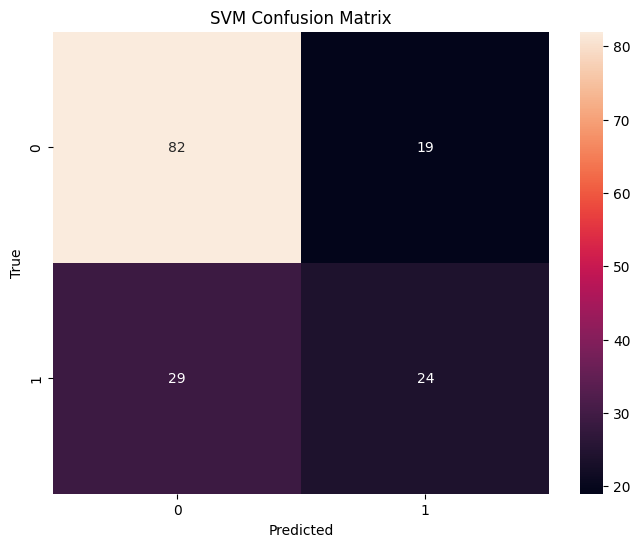

XGB Accuracy: 0.6753
XGB Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       101
           1       0.53      0.51      0.52        53

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



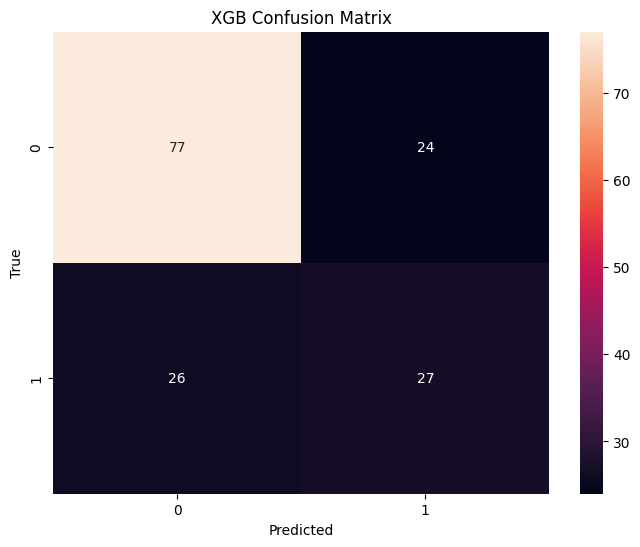

NB Accuracy: 0.7078
NB Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       101
           1       0.55      0.91      0.68        53

    accuracy                           0.71       154
   macro avg       0.73      0.75      0.71       154
weighted avg       0.79      0.71      0.71       154



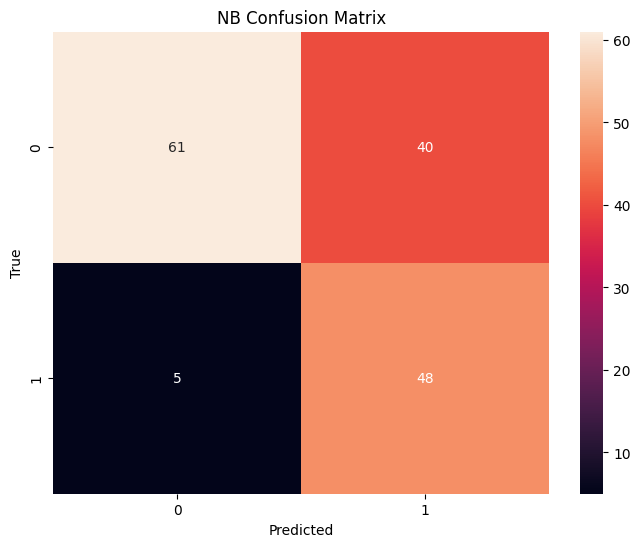

AdaBoost Accuracy: 0.7338
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.62      0.57      0.59        53

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



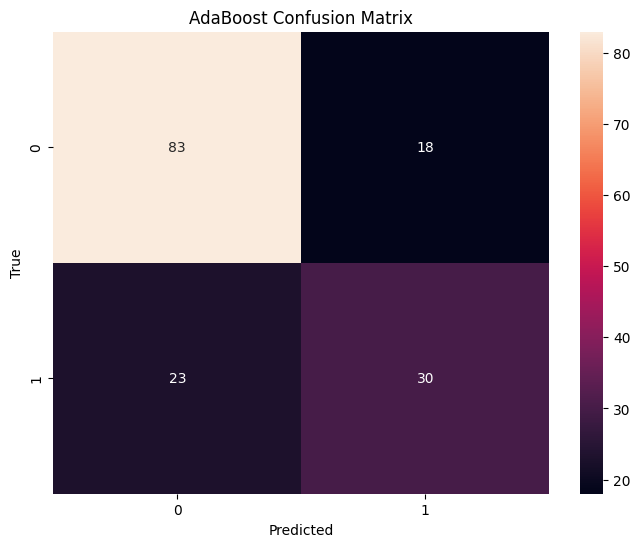

ExtraTrees Accuracy: 0.6883
ExtraTrees Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       101
           1       0.55      0.55      0.55        53

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



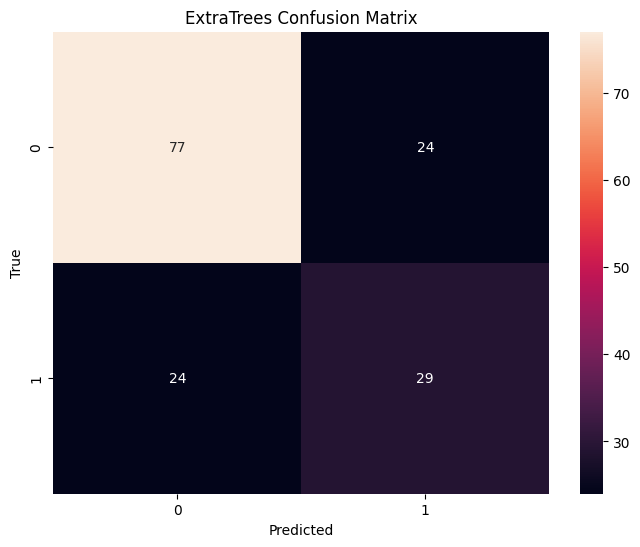

Bagging Accuracy: 0.6623
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       101
           1       0.51      0.55      0.53        53

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.66      0.67       154



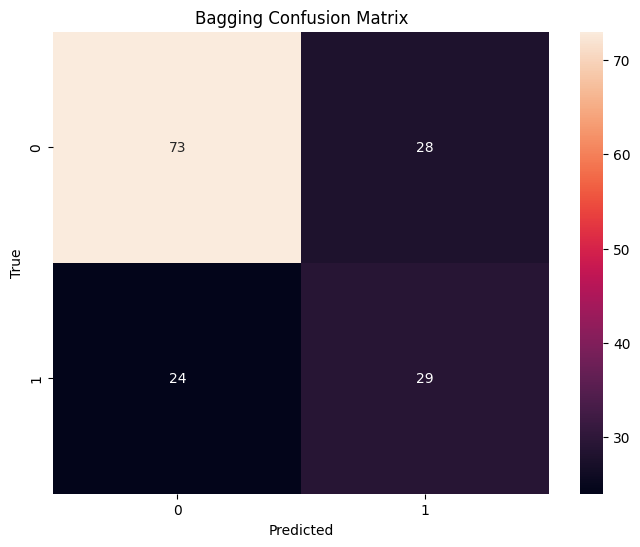

NuSVC Accuracy: 0.7208
NuSVC Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       101
           1       0.59      0.62      0.61        53

    accuracy                           0.72       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.72      0.72       154



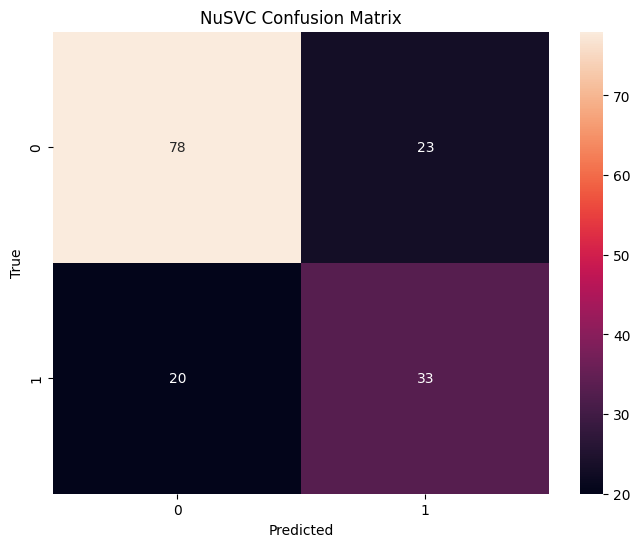

In [ ]:
#all the accuracy store in this accuracy result list and lastly we see only top accuracy form that
accuracy_results = []

for clf_name, clf in classifiers:
    # Train the classifier
    clf.fit(Xprm_train, yprm_train)

    # Make predictions
    y_pred = clf.predict(Xprm_test)

    # Calculate accuracy
    accuracy = accuracy_score(yprm_test, y_pred)
    accuracy_results.append((clf_name, accuracy))

    # Display classification report
    print(f'{clf_name} Accuracy: {accuracy:.4f}')
    print(f'{clf_name} Classification Report:')
    print(classification_report(yprm_test, y_pred))

    # Plot confusion matrix with different color map
    cm = confusion_matrix(yprm_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(f'{clf_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [ ]:
# Display top 5 classifiers based on accuracy
#lambda is the type of function that is work to process the data acording to the instruction
accuracy_results.sort(key=lambda x: x[1], reverse=True)
print("\nTop 5 Classifiers:")
#enumerate is like the book starting with first page and go-on until find last page and stop reding
for i, (clf_name, accuracy) in enumerate(accuracy_results[:5]):
    print(f"{i + 1}. {clf_name} - Accuracy: {accuracy:.4f}")


Top 5 Classifiers:
1. AdaBoost - Accuracy: 0.7338
2. NuSVC - Accuracy: 0.7208
3. LR - Accuracy: 0.7143
4. NB - Accuracy: 0.7078
5. RF - Accuracy: 0.7013


Top 3 Classifiers:
1. AdaBoost - Accuracy: 73.38%
2. NuSVC - Accuracy: 72.08%
3. LR - Accuracy: 71.43%

In [ ]:
# Define hyperparameter grids for XGBoost and Logistic Regression
adaboost_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
}


lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

rf_params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': [3, 5, 7],
    'min_samples_split': [2, 5, 10, 30],
    'max_depth': [3, 5, 8, None]
}

In [ ]:
# AdaBoost hyperparameter tuning
adaboost_model = AdaBoostClassifier(random_state=46)
adaboost_gs_cv = GridSearchCV(adaboost_model, adaboost_params, cv=10, n_jobs=-1, verbose=2).fit(X, y)

print("Best parameters for AdaBoost:", adaboost_gs_cv.best_params_)
adaboost_tuned = AdaBoostClassifier(**adaboost_gs_cv.best_params_).fit(X, y)
adaboost_cv_score = cross_val_score(adaboost_tuned, X, y, cv=10).mean()
print("AdaBoost Tuned Model Cross-Validation Score:", adaboost_cv_score)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 150}
AdaBoost Tuned Model Cross-Validation Score: 0.7669343814080657


In [ ]:

# Logistic Regression hyperparameter tuning
lr_model = LogisticRegression(random_state=46)
lr_gs_cv = GridSearchCV(lr_model, lr_params, cv=10, n_jobs=-1, verbose=2).fit(X_prm, y_prm)

print("\nBest parameters for Logistic Regression:", lr_gs_cv.best_params_)
lr_tuned = LogisticRegression(**lr_gs_cv.best_params_).fit(X_prm, y_prm)
lr_cv_score = cross_val_score(lr_tuned, X_prm, y_prm, cv=10).mean()
print("Logistic Regression Tuned Model Cross-Validation Score:", lr_cv_score)


Fitting 10 folds for each of 12 candidates, totalling 120 fits

Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Tuned Model Cross-Validation Score: 0.7459671907040328


In [ ]:
# NuSVC hyperparameter tuning
'''nusvc_model = NuSVC(random_state=46)
nusvc_gs_cv = GridSearchCV(nusvc_model, nusvc_params, cv=10, n_jobs=-1, verbose=2).fit(X_prm, y_prm)

print("\nBest parameters for NuSVC:", nusvc_gs_cv.best_params_)
nusvc_tuned = NuSVC(**nusvc_gs_cv.best_params_).fit(X_prm, y_prm)
nusvc_cv_score = cross_val_score(nusvc_tuned, X_prm, y_prm, cv=10).mean()
print("NuSVC Tuned Model Cross-Validation Score:", nusvc_cv_score)
'''
# Random Forest hyperparameter tuning
rf_model = RandomForestClassifier(random_state=46)
rf_gs_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_prm, y_prm)

print("\nBest parameters for Random Forest:", rf_gs_cv.best_params_)
rf_tuned = RandomForestClassifier(**rf_gs_cv.best_params_).fit(X_prm, y_prm)
rf_cv_score = cross_val_score(rf_tuned, X_prm, y_prm, cv=10).mean()
print("Random Forest Tuned Model Cross-Validation Score:", rf_cv_score)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits

Best parameters for Random Forest: {'max_depth': 3, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Tuned Model Cross-Validation Score: 0.7499829118250172


0-> normal
1-> abnormal

Splitting

##We check the classifier and now for the production is't better to use the pipeline and the class so that the process is very easy

###Here we use the pipeline and the class named pre-processing that is best option for the production level machine learning project

In [ ]:
'''y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
cols = X.columns
index = X.index'''

'y = df["Outcome"]\nX = df.drop(["Outcome"], axis = 1)\ncols = X.columns\nindex = X.index'

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,30.1,0.349,47.0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
132,3.0,170.0,64.0,225.000,34.5,0.356,30.0
375,12.0,140.0,82.0,318.125,39.2,0.528,58.0
266,0.0,138.0,35.0,0.000,36.3,0.933,25.0
155,7.0,152.0,88.0,0.000,50.0,0.337,36.0
331,2.0,87.0,58.0,52.000,32.7,0.166,25.0
...,...,...,...,...,...,...,...
403,9.0,72.0,78.0,0.000,31.6,0.280,38.0
442,4.0,117.0,64.0,120.000,33.2,0.230,24.0
372,0.0,84.0,64.0,66.000,35.8,0.545,21.0
552,6.0,114.0,88.0,0.000,27.8,0.247,66.0


#Here we set the Pipeline for the traning and then testing

###Pipeline Developed By Ishtiaque Ahmed

In [ ]:

  # Define the classifiers
random_seed = 46
classifiers = [
      ('LR', lr_tuned),
      ('KNN', KNeighborsClassifier()),
      ('DT', DecisionTreeClassifier(random_state=random_seed)),
      ('RF', RandomForestClassifier(random_state=random_seed)),
      ('SVM', SVC(gamma='auto', random_state=random_seed)),
      ('XGB', GradientBoostingClassifier(random_state=random_seed)),
      ('NB', GaussianNB()),
      ('AdaBoost', adaboost_tuned),
      ('ExtraTrees', ExtraTreesClassifier(random_state=random_seed)),
      ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=random_seed), random_state=random_seed)),
      ('NuSVC', NuSVC(random_state=random_seed))
  ]



voting_classifier = VotingClassifier(estimators=classifiers)

  # Create the final pipeline
pipe_for_diabetics = Pipeline([
      ('preprocessor', DataPreprocessor()),
      ('classifier', voting_classifier)
  ])

  # Fit the pipeline on the training data
pipe_for_diabetics.fit_transform(X_train,y_train)

ytrn_pred=pipe_for_diabetics.predict(X_train)
  # Evaluate the model for predicting the test value
y_pred = pipe_for_diabetics.predict(X_test)

In [ ]:
pipe_for_diabetics

Pipeline(steps=[('preprocessor', DataPreprocessor()),
                ('classifier',
                 VotingClassifier(estimators=[('LR',
                                               LogisticRegression(C=100,
                                                                  penalty='l1',
                                                                  solver='liblinear')),
                                              ('KNN', KNeighborsClassifier()),
                                              ('DT',
                                               DecisionTreeClassifier(random_state=46)),
                                              ('RF',
                                               RandomForestClassifier(random_state=46)),
                                              ('SVM',
                                               SVC(gamma='auto',
                                                   random_state=46)),
                                              ('XGB',
                                               GradientBoostingClassifier(random_state=46)),
                                              ('NB', GaussianNB()),
                                              ('AdaBoost',
                                               AdaBoostClassifier(learning_rate=0.2,
                                                                  n_estimators=150)),
                                              ('ExtraTrees',
                                               ExtraTreesClassifier(random_state=46)),
                                              ('Bagging',
                                               BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=46),
                                                                 random_state=46)),
                                              ('NuSVC',
                                               NuSVC(random_state=46))]))])

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
len(y_pred)

154

Model Accuracy: 74.68%

without the SkinThickness


Model Accuracy: 72.73%


with the SkinThickness


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.7468


Those are the train accuracy without using the tuned model
Model Accuracy: 0.8925(without SkinThickness)

Model Accuracy: 0.9007(with SkinThickness)


With use the

In [ ]:
accuracy = accuracy_score(y_train, ytrn_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8893


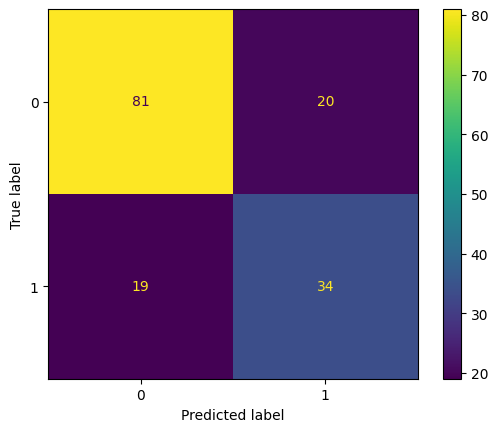

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_disp.plot()
plt.show()

In [ ]:
joblib.dump(pipe_for_diabetics, 'model_for_diabetics.pkl')


loaded_model = joblib.load('model_for_diabetics.pkl')




We drop the SkinThickness and their value so that the model can't get any garbage value

In [ ]:
input_data = np.array([6, 148, 72, 0, 33.6, 0.627, 50]).reshape(1, -1)
#if we want to pass the SkinThickness also we slightly change the class preprocessor and then process them
# For decreasing the complexity of our programme we simply drop or don't pass the unnecessary attribute and their value
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_df = pd.DataFrame(input_data, columns=columns)

#sample test value
#[5, 166, 72, 19, 175, 25.8, 0.587, 51]
#6.0	148.0	72.0	35.0	0.0	33.6	0.627	50.0

prediction = loaded_model.predict(input_df)

# Print the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic
